# What is PyTorch?
It’s a Python-based scientific computing package targeted at two sets of audiences:
* A replacement for NumPy to use the power of GPUs
* A deep learning research platform that provides maximum flexibility and speed

# Bookmarks
* <a href=#Tensors>Python and PyTorch</a>
* <a href=#NNs>Neural Networks in PyTorch</a>
* <a href=#ImTrain>Training an Image Classifier</a>
* <a href=#Transfer>Transfer Learning</a>
* <a href=#Load>Data Loading in PyTorch</a>

# Tensors <a name='Tensors' />
Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

In [ ]:
import torch
import numpy as np

In [ ]:
# construct a 5x3 matrix, uninitialized
print(torch.empty(5, 3))

tensor([[7.9109e-36, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 0.0000e+00, 0.0000e+00]])


In [ ]:
# construct a randomly initialized matrix
print(torch.rand(5, 3))

tensor([[0.1829, 0.5019, 0.3917],
        [0.7899, 0.1236, 0.1777],
        [0.3637, 0.6266, 0.4845],
        [0.4776, 0.3336, 0.1283],
        [0.1247, 0.8680, 0.3541]])


In [ ]:
# construct a matrix filled zeros and of dtype long
print(torch.zeros(5, 3, dtype = torch.long))

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [ ]:
# construct a tensor directly from data
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [ ]:
# create a tensor based on an existing tensor
x = x.new_ones(5, 3, dtype = torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype = torch.float)    # override dtype!
print(x)                                        # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.6546,  0.8765, -0.0616],
        [ 0.1163, -0.6366, -0.4564],
        [-0.2880,  0.4755,  1.3284],
        [-0.0883, -0.5667,  0.5639],
        [-0.4914, -0.0156, -0.1692]])


In [ ]:
# get its size
print(x.size())

torch.Size([5, 3])


# Operations
There are multiple syntaxes for operations. In the following example, we will take a look at the addition operation.

In [ ]:
# addition: syntax 1
y = torch.rand(5, 3)
print(x + y)

tensor([[-0.6410,  1.8346,  0.1362],
        [ 0.7636,  0.1693,  0.5251],
        [ 0.6951,  0.4813,  1.4743],
        [ 0.3777, -0.3402,  0.8808],
        [-0.0341,  0.8055,  0.4923]])


In [ ]:
# addition: syntax 2
print(torch.add(x, y))

tensor([[-0.6410,  1.8346,  0.1362],
        [ 0.7636,  0.1693,  0.5251],
        [ 0.6951,  0.4813,  1.4743],
        [ 0.3777, -0.3402,  0.8808],
        [-0.0341,  0.8055,  0.4923]])


In [ ]:
# addition: providing an output tensor as argument
result = torch.empty(5, 3)
torch.add(x, y, out = result)
print(result)

tensor([[-0.6410,  1.8346,  0.1362],
        [ 0.7636,  0.1693,  0.5251],
        [ 0.6951,  0.4813,  1.4743],
        [ 0.3777, -0.3402,  0.8808],
        [-0.0341,  0.8055,  0.4923]])


In [ ]:
# addition: in-place
y.add_(x)    # adds x to y
print(y)

tensor([[-0.6410,  1.8346,  0.1362],
        [ 0.7636,  0.1693,  0.5251],
        [ 0.6951,  0.4813,  1.4743],
        [ 0.3777, -0.3402,  0.8808],
        [-0.0341,  0.8055,  0.4923]])


Note: <br>
Any operation that mutates a tensor in-place is post-fixed with an \_. For example: x.copy_(y), x.t_(), will change x.

In [ ]:
# you can use standard NumPy-like indexing with all bells and whistles!
print(x[:, 1])

tensor([ 0.8765, -0.6366,  0.4755, -0.5667, -0.0156])


In [ ]:
# resizing: If you want to resize/reshape tensor, you can use torch.view
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)     # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [ ]:
# if you have a one element tensor, use .item() to get the value as a Python number
x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.3663])
-1.3663172721862793


# NumPy Bridge
Converting a Torch Tensor to a NumPy array and vice versa is a breeze.
<br>
The Torch Tensor and NumPy array will share their underlying memory locations (if the Torch Tensor is on CPU), and changing one will change the other.

In [ ]:
# converting a Torch Tensor to a NumPy Array
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [ ]:
# see how the numpy array changed in values
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [ ]:
# converting NumPy Array to Torch Tensor
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out = a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


# CUDA Tensors
Tensors can be moved onto any device using the .to method.

In [ ]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device = device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([-0.3663], device='cuda:0')
tensor([-0.3663], dtype=torch.float64)


# Neural Networks <a name='NNs' />
Neural networks can be constructed using the torch.nn package.
<br>
Now that you had a glimpse of autograd, nn depends on autograd to define models and differentiate them. An nn.Module contains layers, and a method forward(input)that returns the output.
<br> <br>
A typical training procedure for a neural network is as follows:
<br>
* Define the neural network that has some learnable parameters (or weights)
* Iterate over a dataset of inputs
* Process input through the network
* Compute the loss (how far is the output from being correct)
* Propagate gradients back into the network’s parameters
* Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

For example, look at this network that classifies digit images:
![alt text](https://pytorch.org/tutorials/_images/mnist.png)
<br>
It is a simple feed-forward network. It takes the input, feeds it through several layers one after the other, and then finally gives the output.

In [ ]:
# define the network
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*6*6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the forward function, and the backward function (where gradients are computed) is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function.

In [ ]:
# the learnable parameters of a model are returned by net.parameters()
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [ ]:
# let's try a random 32x32 input.

# Note: expected input size of this net (LeNet) is 32x32. To use this net on MNIST dataset, please
# resize the images from the dataset to 32x32.

input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0124,  0.0309,  0.0904,  0.0271,  0.0132, -0.0838, -0.0963, -0.0091,
         -0.0595, -0.0153]], grad_fn=<AddmmBackward>)


In [ ]:
# zero the gradient buffers of all parameters and backprops with random gradients:
net.zero_grad()
out.backward(torch.randn(1, 10))
print(out)

tensor([[ 0.0124,  0.0309,  0.0904,  0.0271,  0.0132, -0.0838, -0.0963, -0.0091,
         -0.0595, -0.0153]], grad_fn=<AddmmBackward>)


Note: <br>
torch.nn only supports mini-batches. The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample.
<br>
For example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width.
<br>
If you have a single sample, just use input.unsqueeze(0) to add a fake batch dimension.

Before proceeding further, let’s recap all the classes you’ve seen so far.
* torch.Tensor - A multi-dimensional array with support for autograd operations like backward(). Also holds the gradient w.r.t. the tensor.
* nn.Module - Neural network module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc.
* nn.Parameter - A kind of Tensor, that is automatically registered as a parameter when assigned as an attribute to a Module.
* autograd.Function - Implements forward and backward definitions of an autograd operation. Every Tensor operation creates at least a single Function node that connects to functions that created a Tensor and encodes its history.

At this point, we covered:
* Defining a neural network
* Processing inputs and calling backward

Still Left:
* Computing the loss
* Updating the weights of the network

# Loss Function
A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.
<br> <br>
There are several different loss functions under the nn package. A simple loss is: nn.MSELoss which computes the mean-squared error between the input and the target.

In [ ]:
output = net(input)
target = torch.randn(10)     # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.1355, grad_fn=<MseLossBackward>)


Now, if you follow loss in the backward direction, using its .grad_fn attribute, you will see a graph of computations that looks like this:

```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
```


So, when we call loss.backward(), the whole graph is differentiated w.r.t. the loss, and all Tensors in the graph that has requires_grad=True will have their .grad Tensor accumulated with the gradient.
<br> <br>
For illustration, let us follow a few steps backward:

In [ ]:
print(loss.grad_fn)                                            # MSELoss
print(loss.grad_fn.next_functions[0][0])                       # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

# Backpropagation
To backpropagate the error all we have to do is to loss.backward(). You need to clear the existing gradients though, else gradients will be accumulated to existing gradients.
<br> <br>
Now we shall call loss.backward(), and have a look at conv1’s bias gradients before and after the backward.

In [ ]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0114, -0.0023, -0.0031, -0.0003,  0.0103,  0.0053])


Now, we have seen how to use loss functions. The only thing left to learn is:
* Updating the weights of the network

# Update the weights

The simplest update rule used in practice is the Stochastic Gradient Descent (SGD): <br>
$$\text{weight} = \text{weight} - \text{learning_rate} \times \text{gradient}$$
<br>
We can implement this using simple python code:

In [ ]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To enable this, we built a small package: torch.optim that implements all these methods. Using it is very simple:

In [ ]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# in your training loop:
optimizer.zero_grad()               # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()                    # Does the update

# Training a Classifier <a name='ImTrain' />
This is it. You have seen how to define neural networks, compute loss and make updates to the weights of the network.

Now you might be thinking,
### What about data?
Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a torch.*Tensor.
* For images, packages such as Pillow, OpenCV are useful
* For audio, packages such as scipy and librosa
* For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful

Specifically for vision, we have created a package called torchvision, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoader.
<br> <br>
This provides a huge convenience and avoids writing boilerplate code.
<br> <br>
For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.
![alt text](https://pytorch.org/tutorials/_images/cifar10.png)

# Training an image classifier

We will do the following steps in order:
1. Load and normalizing the CIFAR10 training and test datasets using torchvision
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

## 1. Loading and normalizing CIFAR10
Using torchvision, it’s extremely easy to load CIFAR10.

In [ ]:
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                        download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4,
                                          shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                       download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                         shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.

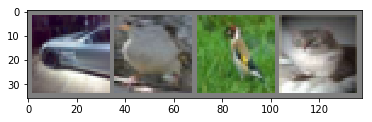

  car  bird  bird   cat


In [ ]:
import matplotlib.pyplot as plt

# functions to show an image
def imshow(img):
    img = img/2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 2. Define a Convolutional Neural Network
Copy the neural network from the Neural Networks section before and modify it to take 3-channel images (instead of 1-channel images as it was defined).

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## 3. Define a loss function and optimizer
Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

## 4. Train the Network
This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [ ]:
for epoch in range(3):  # loop over the dataset multiple times
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d,%5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0
    print('')

print('Finished Training')

[1, 2000] loss: 2.174
[1, 4000] loss: 1.858
[1, 6000] loss: 1.701
[1, 8000] loss: 1.615
[1,10000] loss: 1.545
[1,12000] loss: 1.505

[2, 2000] loss: 1.413
[2, 4000] loss: 1.384
[2, 6000] loss: 1.375
[2, 8000] loss: 1.334
[2,10000] loss: 1.308
[2,12000] loss: 1.279

[3, 2000] loss: 1.221
[3, 4000] loss: 1.216
[3, 6000] loss: 1.192
[3, 8000] loss: 1.181
[3,10000] loss: 1.191
[3,12000] loss: 1.166

Finished Training


## 5. Test the network on the test data
We have trained the network for 3 passes over the training dataset. But we need to check if the network has learnt anything at all.
<br> <br>
We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.
<br> <br>
Okay, first step. Let us display an image from the test set to get familiar.

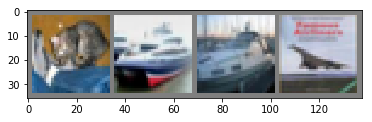

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are.
<br> <br>
The outputs are energies for the 10 classes. The higher the energy for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:

In [ ]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship  ship


The results seem pretty good.
<br> <br>
Let us look at how the network performs on the whole dataset.

In [ ]:
correct, total = 0, 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%'%(100*correct/total))

Accuracy of the network on the 10000 test images: 56 %


That looks waaay better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.
<br> <br>
Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100*class_correct[i]/class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 78 %
Accuracy of  bird : 48 %
Accuracy of   cat : 46 %
Accuracy of  deer : 49 %
Accuracy of   dog : 63 %
Accuracy of  frog : 48 %
Accuracy of horse : 58 %
Accuracy of  ship : 74 %
Accuracy of truck : 50 %


Okay, so what next?
<br> <br>
How do we run these neural networks on the GPU?

# Training on GPU
Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU.
<br> <br>
Let’s first define our device as the first visible cuda device if we have CUDA available:

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


Then these methods will recursively go over all modules and convert their parameters and buffers to CUDA tensors:

In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Remember that you will have to send the inputs and targets at every step to the GPU too:

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)

Why don't I notice MASSIVE speedup compared to CPU? Because your network is realllly small.
<br> <br>
$\textbf{Exercise}$: Try increasing the width of your network (argument 2 of the first nn.Conv2d, and argument 1 of the second nn.Conv2d – they need to be the same number), see what kind of speedup you get.

In [ ]:
from time import time

In [ ]:
start = time()
net = Net().to('cpu')
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
final_loss = 0
for epoch in range(3):  # loop over the dataset multiple times
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            final_loss = running_loss
            running_loss = 0
cpu_time = time() - start
print('[Ori Net, CPU]: Loss %.4f, Time %.4f s'%(final_loss/2000, cpu_time))

start = time()
net = Net().to(device)
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
final_loss = 0
for epoch in range(3):  # loop over the dataset multiple times
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            final_loss = running_loss
            running_loss = 0
gpu_time = time() - start
print('[Ori Net, GPU]: Loss %.4f, Time %.4f s'%(final_loss/2000, gpu_time))
print('[Ori Net]     : Speedup %.2f'%(100*(1 - gpu_time/cpu_time)) + '%')

[Ori Net, CPU]: Loss 1.2031, Time 186.6261 s
[Ori Net, GPU]: Loss 1.1692, Time 144.4033 s
[Ori Net]     : Speedup 22.62%


As notified, there is no massive speedup because of the network size. But we clearly see an improvement of about 19% in the time taken to train the model.
<br> <br>
Now let's try the exercise, which haves us widen the network.

In [ ]:
class WdrNet(nn.Module):
    def __init__(self):
        super(WdrNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
start = time()
wdr_net = WdrNet().to('cpu')
optimizer = optim.SGD(wdr_net.parameters(), lr = 0.001, momentum = 0.9)
final_loss = 0
for epoch in range(3):  # loop over the dataset multiple times
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = wdr_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            final_loss = running_loss
            running_loss = 0
cpu_time = time() - start
print('[Wdr Net, CPU]: Loss %.4f, Time %.4f s'%(final_loss/2000, cpu_time))

start = time()
wdr_net = WdrNet().to(device)
optimizer = optim.SGD(wdr_net.parameters(), lr = 0.001, momentum = 0.9)
final_loss = 0
for epoch in range(3):  # loop over the dataset multiple times
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = wdr_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            final_loss = running_loss
            running_loss = 0
gpu_time = time() - start
print('[Wdr Net, GPU]: Loss %.4f, Time %.4f s'%(final_loss/2000, gpu_time))
print('[Wdr Net]     : Speedup %.2f'%(100*(1 - gpu_time/cpu_time)) + '%')

[Wdr Net, CPU]: Loss 1.1073, Time 192.7760 s
[Wdr Net, GPU]: Loss 1.1203, Time 143.5238 s
[Wdr Net]     : Speedup 25.55%


We see that on a wider network by 4, we see a bigger speedup using GPU to train. From about 19% to about 25%.

Goals achieved:
* Understanding PyTorch’s Tensor library and neural networks at a high level.
* Train a small neural network to classify images

# Transfer Learning <a name='Transfer' />
In this tutorial, you will learn how to train your network using transfer learning.
<br>
You can read more about the transfer learning at http://cs231n.github.io/transfer-learning/.

These two major transfer learning scenarios look as follows:

* $\textbf{Finetuning the convnet}$: Instead of random initializaion, we initialize the network with a pretrained network, like the one that is trained on imagenet 1000 dataset. Rest of the training looks as usual.
* $\textbf{ConvNet as fixed feature extractor}$: Here, we will freeze the weights for all of the network except that of the final fully connected layer. This last fully connected layer is replaced with a new one with random weights and only this layer is trained.

In [ ]:
from torch.optim import lr_scheduler
from torchvision import datasets, models
import os
import copy

plt.ion()

# Load Data

We will use torchvision and torch.utils.data packages for loading the data.
<br> <br>
The problem we’re going to solve today is to train a model to classify ants and bees. We have about 120 training images each for ants and bees. There are 75 validation images for each class. Usually, this is a very small dataset to generalize upon, if trained from scratch. Since we are using transfer learning, we should be able to generalize reasonably well.
<br> <br>
This dataset is a very small subset of imagenet.

Note: <br>
Download the data from https://download.pytorch.org/tutorial/hymenoptera_data.zip and extract it to the current directory

In [ ]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2019-07-22 10:32:32--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.35.253.8, 13.35.253.67, 13.35.253.107, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.35.253.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip.1’

hymenoptera_data.zi 100%[===================>]  45.10M  15.3MB/s    in 3.0s    

2019-07-22 10:32:35 (15.3 MB/s) - ‘hymenoptera_data.zip.1’ saved [47286322/47286322]



!unzip hymenoptera_data.zip
import shutil
shutil.move('/content/hymenoptera_data', '/content/data')

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Visualize a few images
Let’s visualize a few training images so as to understand the data augmentations.

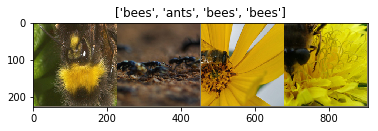

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title = [class_names[x] for x in classes])

# Training the Model
Now, let’s write a general function to train a model. Here, we will illustrate:
* Scheduling the learning rate
* Saving the best model

In the following, parameter scheduler is an LR scheduler object from torch.optim.lr_scheduler.

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs = 25):
    start = time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time() - start
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    #torch.save(best_model_wts, './filename.pth')
    return model

# Visualizing the model predictions
Generic function to display predictions for a few images.

In [ ]:
def visualize_model(model, num_images = 6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode = was_training)
                    return
        model.train(mode = was_training)

# Finetuning the convnet
Load a pretrained model and reset final fully connected layer.

In [ ]:
model_ft = models.resnet18(pretrained = True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr = 0.001, momentum = 0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size = 7, gamma = 0.1)

# Train and evaluate
It should take around 15-25 min on CPU. On GPU though, it takes less than a minute.

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs = 25)

Epoch 0/24
----------
train Loss: 0.6340 Acc: 0.6803
val Loss: 0.2221 Acc: 0.9150

Epoch 1/24
----------
train Loss: 0.3971 Acc: 0.8402
val Loss: 0.3273 Acc: 0.8693

Epoch 2/24
----------
train Loss: 0.5178 Acc: 0.8238
val Loss: 0.2584 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.5267 Acc: 0.8074
val Loss: 0.2693 Acc: 0.9085

Epoch 4/24
----------
train Loss: 0.5737 Acc: 0.8238
val Loss: 0.2586 Acc: 0.9150

Epoch 5/24
----------
train Loss: 0.4456 Acc: 0.8074
val Loss: 0.3621 Acc: 0.8824

Epoch 6/24
----------
train Loss: 0.4145 Acc: 0.8238
val Loss: 0.2295 Acc: 0.9281

Epoch 7/24
----------
train Loss: 0.2937 Acc: 0.8811
val Loss: 0.1987 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.3114 Acc: 0.8525
val Loss: 0.1974 Acc: 0.9281

Epoch 9/24
----------
train Loss: 0.2219 Acc: 0.8934
val Loss: 0.2073 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.2829 Acc: 0.8770
val Loss: 0.2102 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3680 Acc: 0.8238
val Loss: 0.1929 Acc: 0.9346

Ep

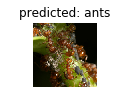

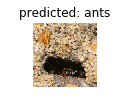

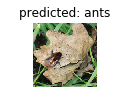

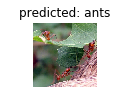

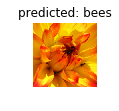

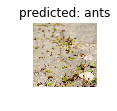

In [ ]:
visualize_model(model_ft)

# ConvNet as fixed feature extractor
Here, we need to freeze all the network except the final layer. We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward().

In [ ]:
model_conv = torchvision.models.resnet18(pretrained = True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr = 0.001, momentum = 0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size = 7, gamma = 0.1)

# Train and evaluate
On CPU this will take about half the time compared to previous scenario. This is expected as gradients don’t need to be computed for most of the network. However, forward does need to be computed.

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs = 25)

Epoch 0/24
----------
train Loss: 0.6324 Acc: 0.6434
val Loss: 0.2052 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.4828 Acc: 0.7828
val Loss: 0.2278 Acc: 0.9281

Epoch 2/24
----------
train Loss: 0.5630 Acc: 0.7582
val Loss: 0.6228 Acc: 0.7451

Epoch 3/24
----------
train Loss: 0.6017 Acc: 0.7541
val Loss: 0.3452 Acc: 0.8954

Epoch 4/24
----------
train Loss: 0.2974 Acc: 0.8648
val Loss: 0.2021 Acc: 0.9542

Epoch 5/24
----------
train Loss: 0.4608 Acc: 0.8033
val Loss: 0.4444 Acc: 0.8562

Epoch 6/24
----------
train Loss: 0.3781 Acc: 0.8484
val Loss: 0.1807 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.3295 Acc: 0.8484
val Loss: 0.1917 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.3960 Acc: 0.8648
val Loss: 0.1961 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3110 Acc: 0.8811
val Loss: 0.1867 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.3137 Acc: 0.8689
val Loss: 0.2091 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.3638 Acc: 0.8525
val Loss: 0.2180 Acc: 0.9412

Ep

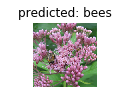

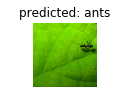

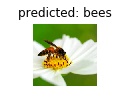

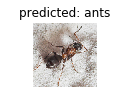

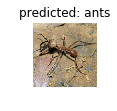

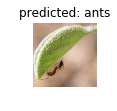

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

# Data Loading and Processing <a name='Load' />
A lot of effort in solving any machine learning problem goes in to preparing the data. PyTorch provides many tools to make data loading easy and hopefully, to make your code more readable. In this tutorial, we will see how to load and preprocess/augment data from a non trivial dataset.
<br> <br>
To run this tutorial, please make sure the following packages are installed:
* scikit-image: For image io and transforms
* pandas: For easier csv parsing

In [ ]:
import pandas as pd
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
from torchvision import utils

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

plt.ion()   # interactive mode

The dataset we are going to deal with is that of facial pose. This means that a face is annotated like this: ![alt_text](https://pytorch.org/tutorials/_images/landmarked_face2.png)
<br>
Over all, 68 different landmark points are annotated for each face.

Note: <br>
Download the dataset from [here](https://download.pytorch.org/tutorial/faces.zip) so that the images are in a directory named ‘data/faces/’. This dataset was actually generated by applying excellent [dlib’s pose estimation](https://blog.dlib.net/2014/08/real-time-face-pose-estimation.html) on a few images from imagenet tagged as ‘face’.

In [ ]:
!wget https://download.pytorch.org/tutorial/faces.zip

--2019-07-22 10:37:08--  https://download.pytorch.org/tutorial/faces.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.35.253.67, 13.35.253.87, 13.35.253.8, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.35.253.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5780252 (5.5M) [application/zip]
Saving to: ‘faces.zip.1’

faces.zip.1         100%[===================>]   5.51M  24.7MB/s    in 0.2s    

2019-07-22 10:37:09 (24.7 MB/s) - ‘faces.zip.1’ saved [5780252/5780252]



!unzip faces.zip
shutil.move('/content/faces', '/content/data')

Dataset comes with a csv file with annotations which looks like this:

```
image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x, ... ,part_67_x,part_67_y
0805personali01.jpg,27,83,27,98, ... 84,134
1084239450_e76e00b7e7.jpg,70,236,71,257, ... ,128,312
```

Let’s quickly read the CSV and get the annotations in an (N, 2) array where N is the number of landmarks.

In [ ]:
landmarks_frame = pd.read_csv('data/faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:].as_matrix()
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


Let’s write a simple helper function to show an image and its landmarks and use it to show a sample.

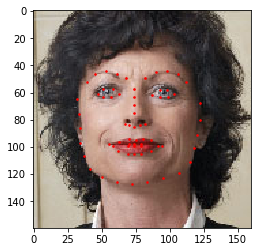

In [ ]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s = 10, marker = '.', c = 'r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join('data/faces/', img_name)),
               landmarks)
plt.show()

# Dataset class
torch.utils.data.Dataset is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:
* \_\_len\_\_ so that len(dataset) returns the size of the dataset.
* \_\_getitem\_\_ to support the indexing such that dataset[i] can be used to get ith sample

Let’s create a dataset class for our face landmarks dataset. We will read the csv in \_\_init\_\_ but leave the reading of images to \_\_getitem\_\_. This is memory efficient because all the images are not stored in the memory at once but read as required.
<br> <br>
Sample of our dataset will be a dict {'image': image, 'landmarks': landmarks}. Our dataset will take an optional argument transform so that any required processing can be applied on the sample. We will see the usefulness of transform in the next section.

In [ ]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform = None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}
        if self.transform:
            sample = self.transform(sample)
        return sample

Let’s instantiate this class and iterate through the data samples. We will print the sizes of first 4 samples and show their landmarks.

0 (324, 215, 3) (68, 2)


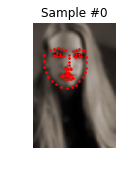

1 (500, 333, 3) (68, 2)


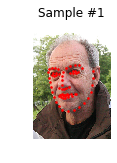

2 (250, 258, 3) (68, 2)


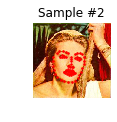

3 (434, 290, 3) (68, 2)


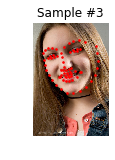

In [ ]:
face_dataset = FaceLandmarksDataset(csv_file = 'data/faces/face_landmarks.csv',
                                    root_dir = 'data/faces/')

fig = plt.figure()
for i in range(len(face_dataset)):
    sample = face_dataset[i]
    print(i, sample['image'].shape, sample['landmarks'].shape)
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)
    if i == 3:
        plt.show()
        break

# Transforms
One issue we can see from the above is that the samples are not of the same size. Most neural networks expect the images of a fixed size. Therefore, we will need to write some prepocessing code. Let’s create three transforms:
* Rescale: to scale the image
* RandomCrop: to crop from image randomly. This is data augmentation.
* ToTensor: to convert the numpy images to torch images (we need to swap axes).

We will write them as callable classes instead of simple functions so that parameters of the transform need not be passed everytime it’s called. For this, we just need to implement \_\_call\_\_ method and if required, \_\_init\_\_ method. We can then use a transform like this:

```
tsfm = Transform(params)
transformed_sample = tsfm(sample)
```
Observe below how these transforms had to be applied both on the image and landmarks.

In [ ]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}

class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

# Compose transforms
Now, we apply the transforms on an sample.
<br> <br>
Let’s say we want to rescale the shorter side of the image to 256 and then randomly crop a square of size 224 from it. i.e, we want to compose Rescale and RandomCrop transforms. torchvision.transforms.Compose is a simple callable class which allows us to do this.

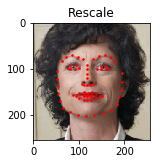

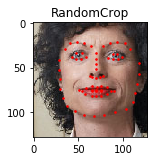

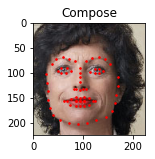

In [ ]:
scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

# Iterating through the dataset
Let’s put this all together to create a dataset with composed transforms. To summarize, every time this dataset is sampled:
* An image is read from the file on the fly
* Transforms are applied on the read image
* Since one of the transforms is random, data is augmentated on sampling

In [ ]:
transformed_dataset = FaceLandmarksDataset(csv_file = 'data/faces/face_landmarks.csv',
                                           root_dir = 'data/faces/',
                                           transform = transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['landmarks'].size())
    if i == 3:
        break

0 torch.Size([3, 224, 224]) torch.Size([68, 2])
1 torch.Size([3, 224, 224]) torch.Size([68, 2])
2 torch.Size([3, 224, 224]) torch.Size([68, 2])
3 torch.Size([3, 224, 224]) torch.Size([68, 2])


However, we are losing a lot of features by using a simple for loop to iterate over the data. In particular, we are missing out on:
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

torch.utils.data.DataLoader is an iterator which provides all these features. Parameters used below should be clear. One parameter of interest is collate_fn. You can specify how exactly the samples need to be batched using collate_fn. However, default collate should work fine for most use cases.

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])


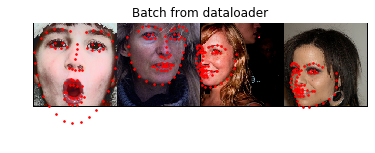

In [ ]:
dataloader = DataLoader(transformed_dataset, batch_size = 4,
                        shuffle = True, num_workers = 4)

# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
                    landmarks_batch[i, :, 1].numpy() + grid_border_size,
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

# Afterword: torchvision
In this tutorial, we have seen how to write and use datasets, transforms and dataloader. torchvision package provides some common datasets and transforms. You might not even have to write custom classes. One of the more generic datasets available in torchvision is ImageFolder. It assumes that images are organized in the following way:
```
root/ants/xxx.png
root/ants/xxy.jpeg
root/ants/xxz.png
.
.
.
root/bees/123.jpg
root/bees/nsdf3.png
root/bees/asd932_.png
```
where ‘ants’, ‘bees’ etc. are class labels. Similarly generic transforms which operate on PIL.Image like RandomHorizontalFlip, Scale, are also available. You can use these to write a dataloader like this:

In [ ]:
data_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.485, 0.456, 0.406],
                             std = [0.229, 0.224, 0.225])
    ])
hymenoptera_dataset = datasets.ImageFolder(root = 'data/hymenoptera_data/train',
                                           transform = data_transform)
dataset_loader = torch.utils.data.DataLoader(hymenoptera_dataset,
                                             batch_size = 4, shuffle = True,
                                             num_workers = 4)

# End of Hands-on Pytorch